# Marketing Campaigns of a Portuguese Banking Institution

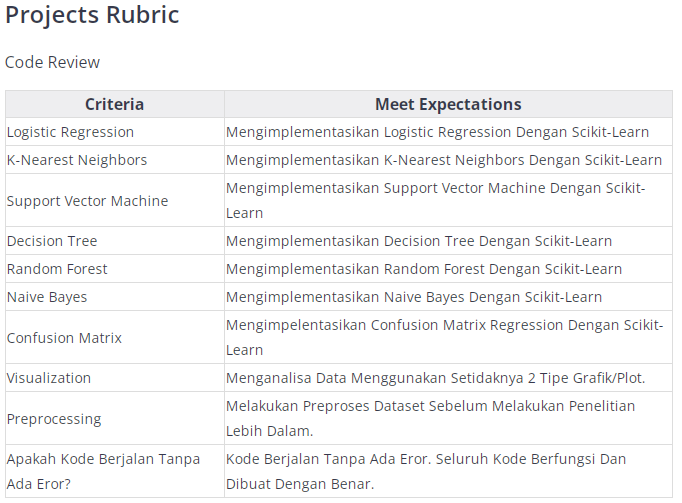

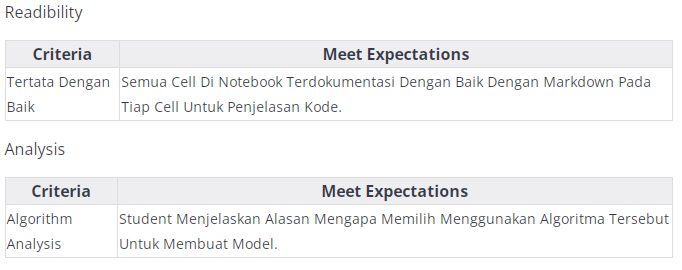

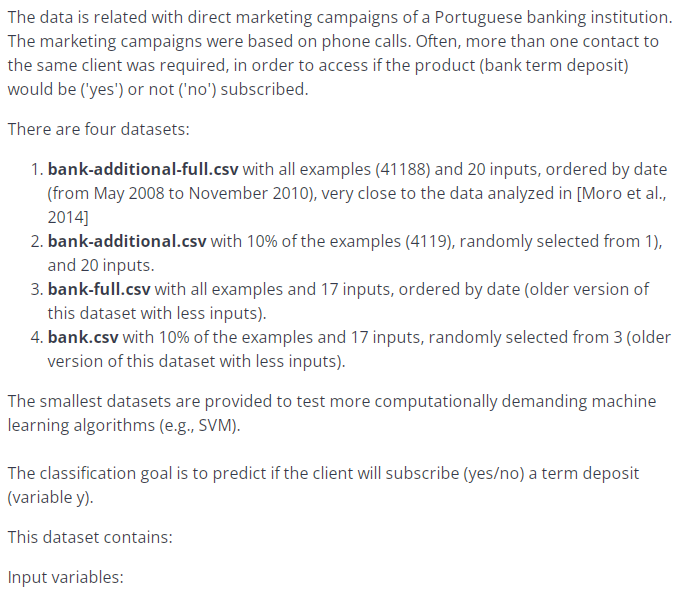

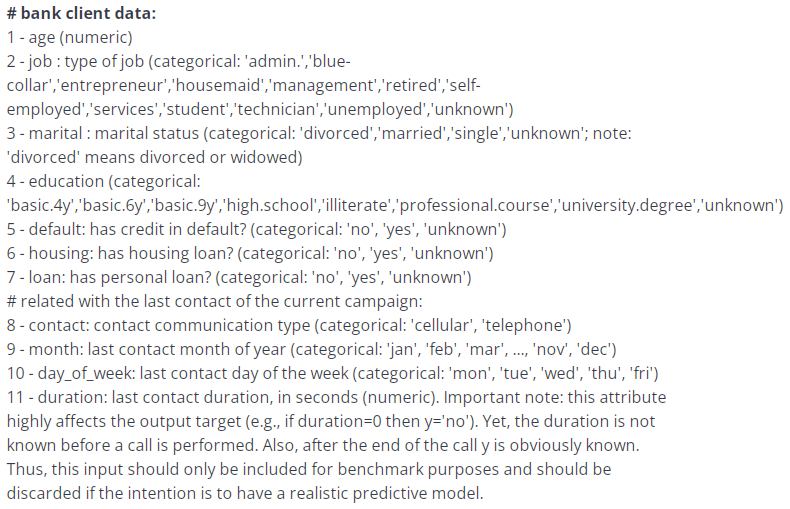

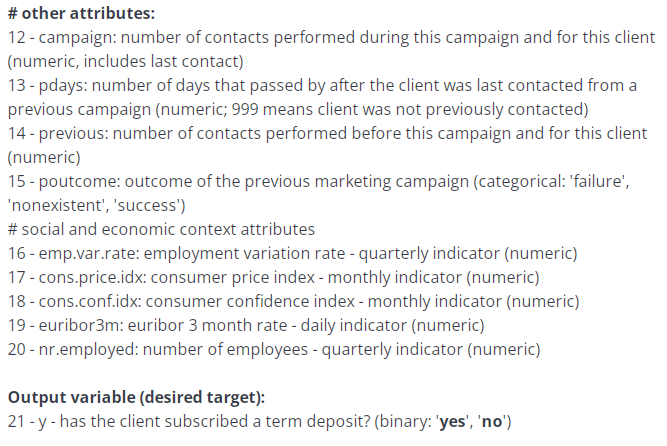

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn import metrics


In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df['marital'].replace({'married':2,'single':1,'divorced':3},inplace=True)
df['job'].replace({'management':1,'blue-collar':2,
                   'technician':3,'admin.':4,
                   'services':5,'retired':6,
                   'self-employed':7,'entrepreneur':8,
                   'unemployed':9,'housemaid':10,
                   'student':11,'unknown':12},inplace=True)
df['education'].replace({'primary':1,'secondary':2,'tertiary':3,'unknown':0},inplace=True)
df['y'].replace({'no':0,'yes':1},inplace=True)
df['housing'].replace({'no':0,'yes':1},inplace=True)
df['default'].replace({'no':0,'yes':1},inplace=True)
df['loan'].replace({'no':0,'yes':1},inplace=True)
df['contact'].replace({'cellular':1,'telephone':2,'unknown':0},inplace=True)
df['poutcome'].replace({'unknown':3,'failure':0,'succes':1,'other':2},inplace=True)

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,2,1,0,1787,0,0,1,19,oct,79,1,-1,0,3,0
1,33,5,2,2,0,4789,1,1,1,11,may,220,1,339,4,0,0
2,35,1,1,3,0,1350,1,0,1,16,apr,185,1,330,1,0,0
3,30,1,2,3,0,1476,1,1,0,3,jun,199,4,-1,0,3,0
4,59,2,2,2,0,0,1,0,0,5,may,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,5,2,2,0,-333,1,0,1,30,jul,329,5,-1,0,3,0
4517,57,7,2,3,1,-3313,1,1,0,9,may,153,1,-1,0,3,0
4518,57,3,2,2,0,295,0,0,1,19,aug,151,11,-1,0,3,0
4519,28,2,2,2,0,1137,0,0,1,6,feb,129,4,211,3,2,0


In [8]:
x=df[['age','job','marital','education','housing','balance','duration']]
y=df['y']

In [9]:
print(x,y)

      age  job  marital  education  housing  balance  duration
0      30    9        2          1        0     1787        79
1      33    5        2          2        1     4789       220
2      35    1        1          3        1     1350       185
3      30    1        2          3        1     1476       199
4      59    2        2          2        1        0       226
...   ...  ...      ...        ...      ...      ...       ...
4516   33    5        2          2        1     -333       329
4517   57    7        2          3        1    -3313       153
4518   57    3        2          2        0      295       151
4519   28    2        2          2        0     1137       129
4520   44    8        1          3        1     1136       345

[4521 rows x 7 columns] 0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64


In [38]:
df['age'].value_counts()

34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: age, Length: 67, dtype: int64

In [73]:
bins=[15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
freq, _ = pd.cut(df['age'], bins=bins, include_lowest=True, right=False, retbins=True)
df_plot = pd.Series(freq.value_counts(), index=freq.unique())
df_plot.sort_index(inplace=True)

In [77]:
df_plot

[15, 20)      4
[20, 25)     63
[25, 30)    415
[30, 35)    990
[35, 40)    818
[40, 45)    638
[45, 50)    565
[50, 55)    443
[55, 60)    411
[60, 65)     85
[65, 70)     28
[70, 75)     26
[75, 80)     21
[80, 85)     12
[85, 90)      2
Name: age, dtype: int64

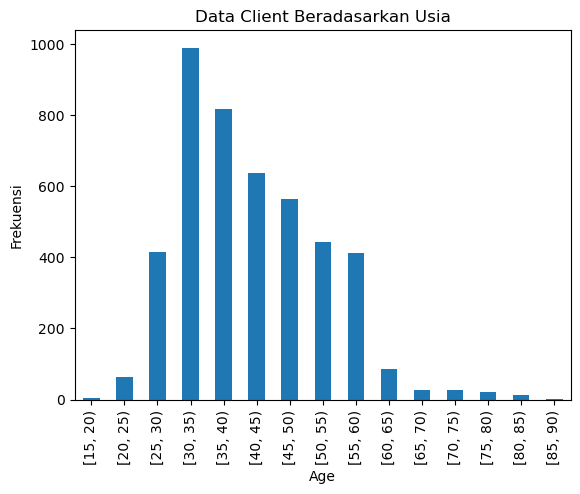

In [78]:
df_plot.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.title('Data Client Beradasarkan Usia')
plt.show()

Berdasarkan data tersebut, ditunjukkan bahwa mayoritas client bank berusia antara 30-50 tahun, atau lebih spesifik clien bank terbanyak berada pada usia 30-35. Dimana diusia tersebut memang usia seseorang dalam masa aktif bekerja dan kemudian menabung melalui bank.

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.3)

## Logistic Regression

In [11]:
model= LogisticRegression(solver='liblinear',random_state=0)
model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto',n_jobs=None, penalty='12',
                   random_state=0, solver='lbfgs',tol=0.0001,
                   verbose=0, warm_start=False)

LogisticRegression(penalty='12', random_state=0)

In [12]:
predict_lr = model.predict(x_cv)
confusion_matrix(y_cv,predict_lr)
predict_value_lr =model.predict([[25,1,2,3,1,2000,960]])
print('Predicted Value: ',predict_value_lr)
print('Accuracy:',metrics.accuracy_score(y_cv,predict_lr))

Predicted Value:  [0]
Accuracy: 0.8960943257184967


E:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Menurut klasifikasi dari Logistic Regression, dengan prediksi client pada usia 25 tahun, bekerja sebagai manajemen, sudah menikah, berpendidikan tinggi, sudah memiliki rumah, mempunyai saldo sebanyak 2000 dolar, dan memiliki durasi kontak terakhir sebesar 960s. Klien dinyatakan **tidak berlangganan deposito berjangka**, dengan tingkat akurasi prediksi mencapai **89.61%**

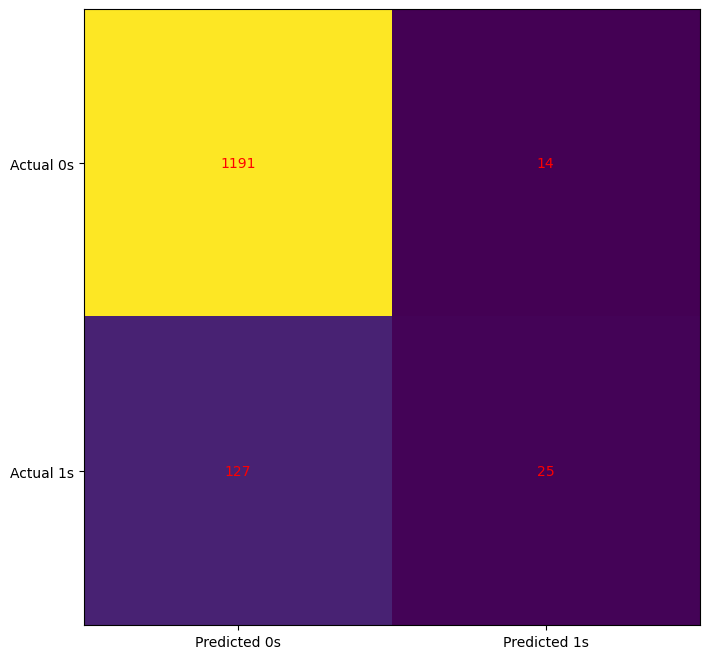

In [13]:
cm = confusion_matrix(y_cv,predict_lr)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

plt.show()

Dari hasil output Confusion matrix diatas dapat diketahui bahwa model dapat menebak 1191 data dengan label '0':'No' yang berarti (True Negative), false negativenya 127, false positive sebesar 14, dan 25 data dengan label '1':'yes'(true positive).

## KNN

In [14]:
model = KNeighborsClassifier()

model.fit(x_train,y_train)
predict_knn = model.predict(x_cv)
predict_value_knn =model.predict([[25,1,2,3,1,2000,960]])
print('Predicted Value: ',predict_value_knn)
print('Accuracy:',metrics.accuracy_score(y_cv,predict_knn))

Predicted Value:  [1]
Accuracy: 0.8747236551215918


E:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Menurut klasifikasi dari K-Nearest Neighbor, dengan prediksi client pada usia 25 tahun, bekerja sebagai manajemen, sudah menikah, berpendidikan tinggi, sudah memiliki rumah, mempunyai saldo sebanyak 2000 dolar, dan memiliki durasi kontak terakhir sebesar 960s. Klien dinyatakan **berlangganan deposito berjangka**, dengan tingkat akurasi prediksi mencapai **87.47%**

## Naive Bayes

In [15]:
model = GaussianNB()

model.fit(x_train, y_train)
predict_nb=model.predict(x_cv)
predict_value_nb =model.predict([[25,1,2,3,1,2000,960]])
print('Predicted Value: ',predict_value_nb)
print('Accuracy:',metrics.accuracy_score(y_cv,predict_nb))

Predicted Value:  [1]
Accuracy: 0.8872512896094326


E:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Menurut klasifikasi dari Naive Bayes, dengan prediksi client pada usia 25 tahun, bekerja sebagai manajemen, sudah menikah, berpendidikan tinggi, sudah memiliki rumah, mempunyai saldo sebanyak 2000 dolar, dan memiliki durasi kontak terakhir sebesar 960s. Klien dinyatakan **berlangganan deposito berjangka**, dengan tingkat akurasi prediksi mencapai **88.75%**

## Decision Tree

In [16]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=5)
model=model.fit(x_train,y_train)
predict_dt = model.predict(x_cv)
predict_value_dt =model.predict([[25,1,2,3,1,2000,960]])
print('Predicted Value: ',predict_value_dt)
print('Accuracy:',metrics.accuracy_score(y_cv,predict_dt))

E:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicted Value:  [1]
Accuracy: 0.8850405305821666


Menurut klasifikasi dari Decision Tree, dengan prediksi client pada usia 25 tahun, bekerja sebagai manajemen, sudah menikah, berpendidikan tinggi, sudah memiliki rumah, mempunyai saldo sebanyak 2000 dolar, dan memiliki durasi kontak terakhir sebesar 960s. Klien dinyatakan **berlangganan deposito berjangka**, dengan tingkat akurasi prediksi mencapai **88.50%**

In [17]:
features = ['age','job','marital','education','housing','balance','duration']

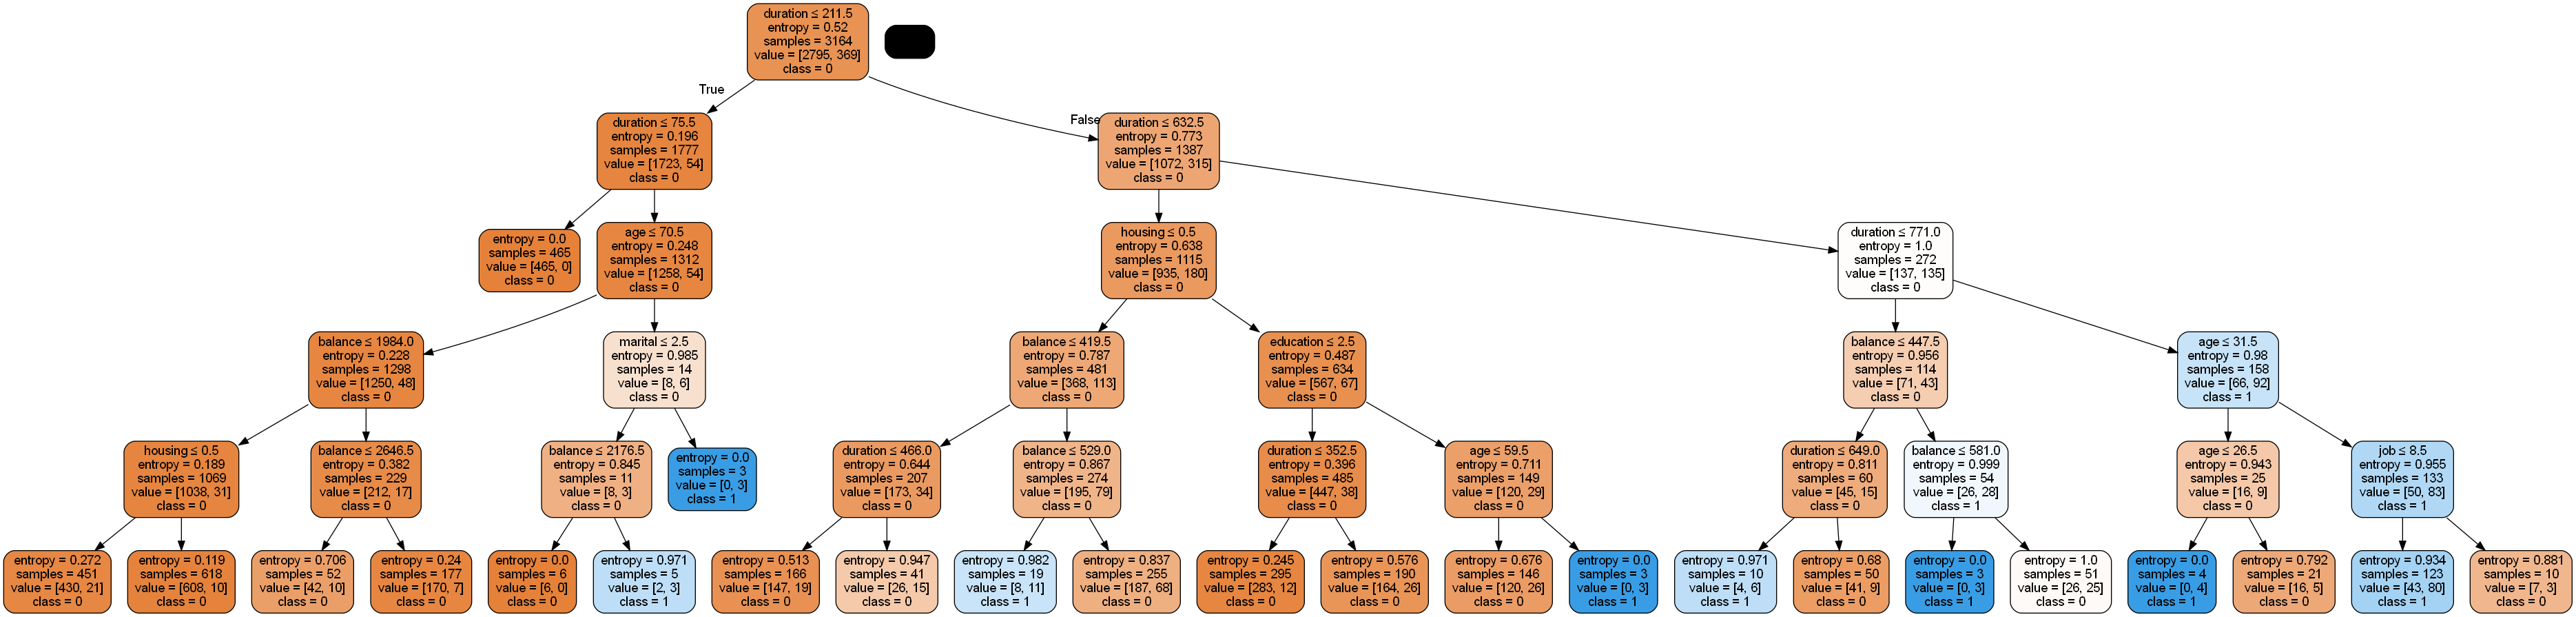

In [18]:
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,
                     class_names=['0','1'],
                     feature_names=features,
                     filled=True,
                     rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forest

In [19]:
model =  RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predict_rf=model.predict(x_cv)
predict_value_rf =model.predict([[25,1,2,3,1,2000,960]])
print('Predicted Value: ',predict_value_rf)
print('Accuracy:',metrics.accuracy_score(y_cv,predict_rf))

Predicted Value:  [1]
Accuracy: 0.887988209285188


E:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Menurut klasifikasi dari Random Forest, dengan prediksi client pada usia 25 tahun, bekerja sebagai manajemen, sudah menikah, berpendidikan tinggi, sudah memiliki rumah, mempunyai saldo sebanyak 2000 dolar, dan memiliki durasi kontak terakhir sebesar 960s. Klien dinyatakan **berlangganan deposito berjangka**, dengan tingkat akurasi prediksi mencapai **88.80%**

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
RandomForestClassifier(bootstrap=True, class_weight=None,criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

In [22]:
feature_imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
feature_imp

duration     0.396927
balance      0.222867
age          0.191060
job          0.086292
education    0.043326
marital      0.038691
housing      0.020837
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


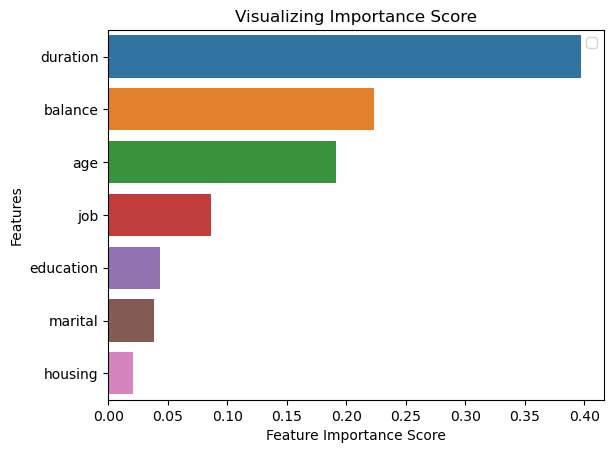

In [23]:
import seaborn as sns
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Importance Score')
plt.legend()
plt.show()

In [87]:
x_imp=df[['age','job','balance','duration']]
x_train_imp, x_cv_imp, y_train_imp, y_cv_imp = train_test_split(x_imp,y,test_size=0.3)

In [88]:
model =  RandomForestClassifier(n_estimators=100)
model.fit(x_train_imp,y_train_imp)
predict_imp_rf=model.predict(x_cv_imp)
predict_value_imp =model.predict([[25,1,2000,960]])
print('Predicted Value: ',predict_value_imp)
print('Accuracy:',metrics.accuracy_score(y_cv_imp,predict_imp_rf))

Predicted Value:  [0]
Accuracy: 0.8820928518791452


E:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Menurut klasifikasi dari Random Forest versi 4 Importance parameter (age, job, balance, duration), dengan prediksi client pada usia 25 tahun, bekerja sebagai manajemen, mempunyai saldo sebanyak 2000 dolar, dan memiliki durasi kontak terakhir sebesar 960s. Klien dinyatakan **tidak berlangganan deposito berjangka**, dengan tingkat akurasi prediksi mencapai **88.21%**

## Support Vektor Machine

In [26]:
model=svm.SVC()
model.fit(x_train,y_train)
predict_svm=model.predict(x_cv)
predict_value_svm =model.predict([[25,1,2,3,1,2000,960]])
print('Predicted Value: ',predict_value_svm)
print('Accuracy:',metrics.accuracy_score(y_cv,predict_svm))

Predicted Value:  [0]
Accuracy: 0.887988209285188


E:\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Menurut klasifikasi dari Support Vector Machine, dengan prediksi client pada usia 25 tahun, bekerja sebagai manajemen, sudah menikah, berpendidikan tinggi, sudah memiliki rumah, mempunyai saldo sebanyak 2000 dolar, dan memiliki durasi kontak terakhir sebesar 960s. Klien dinyatakan **tidak berlangganan deposito berjangka**, dengan tingkat akurasi prediksi mencapai **88.80%**

In [83]:
print('Nilai Akurasi dari beberapa Prediksi')
print('Logistic Regression:', accuracy_score(y_cv, predict_lr))
print('K-N Neighbors:', accuracy_score(y_cv, predict_knn))
print('Naive-Bayes:', accuracy_score(y_cv, predict_nb))
print('Decision Tree:', accuracy_score(y_cv, predict_dt))
print('Random Forest:', accuracy_score(y_cv, predict_rf))
print('Support Vectro Machine:', accuracy_score(y_cv, predict_svm))

Nilai Akurasi dari beberapa Prediksi
Logistic Regression: 0.8960943257184967
K-N Neighbors: 0.8747236551215918
Naive-Bayes: 0.8872512896094326
Decision Tree: 0.8850405305821666
Random Forest: 0.887988209285188
Support Vectro Machine: 0.887988209285188


In [84]:
print('Hasil Prediksi dari: (25,1,2,3,1,2000,960)\n 25, management,maried,tertiary,housing,2000,960s')
print('Logistic Regression:', predict_value_lr)
print('K-N Neighbors:', predict_value_knn)
print('Naive-Bayes:', predict_value_nb)
print('Decision Tree:', predict_value_dt)
print('Random Forest:', predict_value_rf)
print('Support Vectro Machine:', predict_value_svm)

Hasil Prediksi dari: (25,1,2,3,1,2000,960)
 25, management,maried,tertiary,housing,2000,960s
Logistic Regression: [0]
K-N Neighbors: [1]
Naive-Bayes: [1]
Decision Tree: [1]
Random Forest: [1]
Support Vectro Machine: [0]


Dari Hasil Analisis dibuktikan bahwa tingkat akurasi tertinggi dimiliki oleh Machine Learning Classification dengan metode Logistic Regression dengan tingkat akurasi sebesar 0.89 atau 89%. Hasil akurasi dari Metode Random Forest dan Support Vevtor Machine sama persis yaitu sebesar 0.887988 atau 88.80%. Sedangkan untuk prediksi Value dari (25,1,2,3,1,2000,960) 25, management,maried,tertiary,housing,2000,960s. Hasil untuk Logistic Regression dan Support Vector Machine berbeda (0, tidak berlangganan deposito) berbeda dengan metode lain yang menilainya (1, berlangganan deposito). Sedangkan menurut klasifikasi dari metode Random Forest versi Importance parameter dengan tingkat akurasi 88.21% dinyatakan hasil (0, tidak berlangganan deposito), Hal ini semakin mendukung Hasil dari Metode Logistic Regression